In [85]:
import pandas as pd
import seaborn as sns

In [86]:
data=pd.read_csv(r"C:\Users\91785\Documents\GitHub\Naitikpareek123\python\crystling\housing.csv")

In [87]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: >

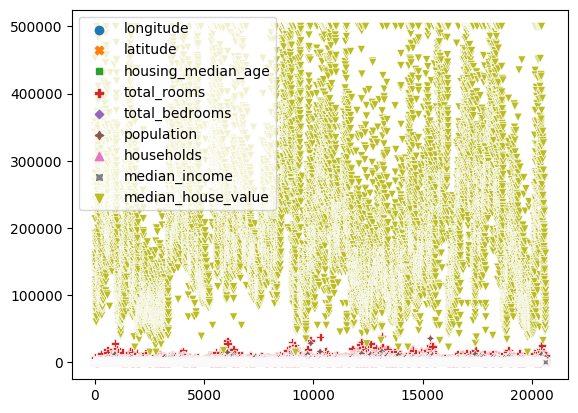

In [88]:
sns.scatterplot(data)

<Axes: xlabel='longitude', ylabel='latitude'>

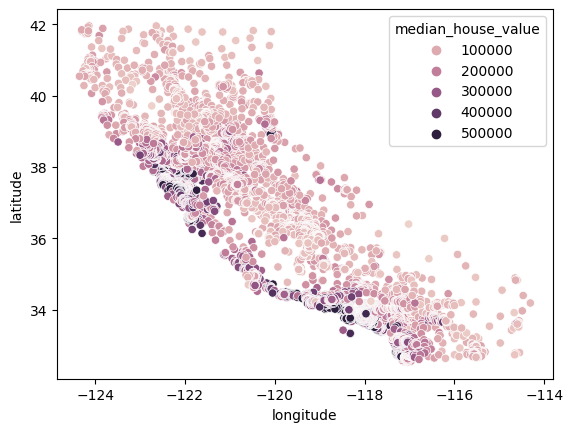

In [89]:
sns.scatterplot(data[["longitude","latitude","median_house_value"]],x='longitude',y='latitude',hue='median_house_value')

<Axes: xlabel='longitude', ylabel='latitude'>

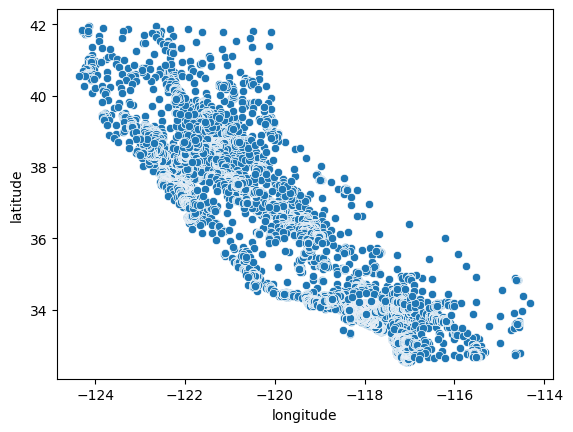

In [ ]:
sns.scatterplot(data[["longitude","latitude","median_house_value"]],x='longitude',y='latitude',color='r')

In [91]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [92]:
x=data[["longitude","latitude"]]
y=data[["median_house_value"]]

In [93]:
x_normalize=preprocessing.normalize(x)
x_normalize

array([[-0.9551823 ,  0.29601821],
       [-0.95521964,  0.29589769],
       [-0.9552554 ,  0.29578221],
       ...,
       [-0.95095679,  0.30932376],
       [-0.95103176,  0.30909316],
       [-0.95111014,  0.30885191]])

In [94]:
y_normalize=preprocessing.normalize(y)
y_normalize

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [95]:
kmn=KMeans(n_clusters=7,random_state=2,n_init="auto")

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_normalize,y_normalize,test_size=0.2,random_state=42)

In [98]:
reg=kmn.fit(x_train)

In [99]:
x=data[["longitude","latitude"]]
y=data[["median_house_value"]]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
x_normalize=preprocessing.normalize(x_train)
x_normalize

array([[-0.9630887 ,  0.26918424],
       [-0.96150245,  0.27479636],
       [-0.96102269,  0.27646951],
       ...,
       [-0.96107847,  0.27627555],
       [-0.95566033,  0.29447126],
       [-0.95555427,  0.29481526]])

In [103]:
y_normalize=preprocessing.normalize(y_train)
y_normalize

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

<Axes: xlabel='longitude', ylabel='latitude'>

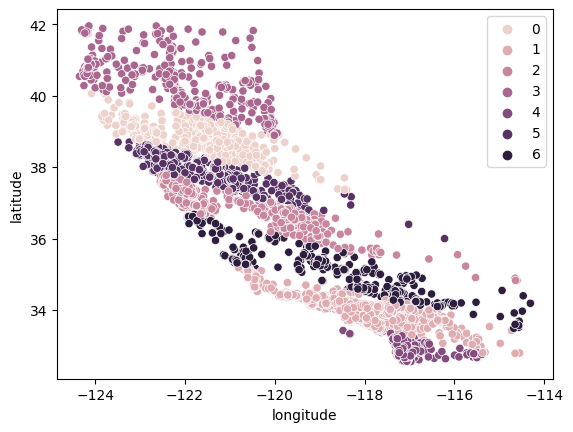

In [104]:
sns.scatterplot(data=x_train,x='longitude',y='latitude',hue=kmn.labels_)

In [105]:
from sklearn import metrics
metrics.silhouette_score(x_train,kmn.labels_)

0.35321090576195646